In [ ]:
import tensorflow as tf
import os
import pandas as pd

In [ ]:
data_root = tf.keras.utils.get_file('flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', untar=True)
# Get path of root dir
# data_root = pathlib.Path(data_root)

In [ ]:
print(data_root)

/root/.keras/datasets/flower_photos


In [ ]:
flower_photos_dir = '/root/.keras/datasets/flower_photos'
# Get the list of all paths 
flower_photos_classes = os.listdir(flower_photos_dir)

In [ ]:
flower_photos_classes[0:5]

['LICENSE.txt', 'sunflowers', 'roses', 'tulips', 'daisy']

In [ ]:
# List of all the URLs 
flower_urls = []
# List of labels (Tulip, etc) that correspond to flower_urls
flower_labels = []

In [ ]:
for path in flower_photos_classes[1:]:
  flower_photo_class_dir = os.path.join(flower_photos_dir, path)
  print('Dir: ', flower_photo_class_dir)
  # Get list of .jpg files in each specific class
  img_paths = os.listdir(flower_photo_class_dir)
  img_paths = [os.path.join(flower_photo_class_dir, x) for x in img_paths]
  print('Number of images in class: ', len(img_paths))
  flower_urls.extend(img_paths)
  flower_labels.extend([path] * len(img_paths))

Dir:  /root/.keras/datasets/flower_photos/sunflowers
Number of images in class:  699
Dir:  /root/.keras/datasets/flower_photos/roses
Number of images in class:  641
Dir:  /root/.keras/datasets/flower_photos/tulips
Number of images in class:  799
Dir:  /root/.keras/datasets/flower_photos/daisy
Number of images in class:  633
Dir:  /root/.keras/datasets/flower_photos/dandelion
Number of images in class:  898


In [ ]:
flower_urls[0:5]

['/root/.keras/datasets/flower_photos/sunflowers/2927020075_54c9186797_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/5020805135_1219d7523d.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/5994572653_ea98afa3af_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/13117907313_86c99c6441.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/20171662239_f69b6c12bd_n.jpg']

In [ ]:
flower_labels[0:5]

['sunflowers', 'sunflowers', 'sunflowers', 'sunflowers', 'sunflowers']

In [ ]:
flower_urls[1500:1510]

['/root/.keras/datasets/flower_photos/tulips/2351637471_5dd34fd3ac_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/7179796338_05e8b1c87b.jpg',
 '/root/.keras/datasets/flower_photos/tulips/779359602_30abcbf5bb_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/17295127995_62eff434fe_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/14067778605_0285b7cc3a.jpg',
 '/root/.keras/datasets/flower_photos/tulips/116343334_9cb4acdc57_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/4508346090_a27b988f79_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/13509967925_eaaeefa396_m.jpg',
 '/root/.keras/datasets/flower_photos/tulips/3510294699_bc4c72cb7d_n.jpg',
 '/root/.keras/datasets/flower_photos/tulips/6187740107_9813ccc41e.jpg']

In [ ]:
flower_labels[1500:1510]

['tulips',
 'tulips',
 'tulips',
 'tulips',
 'tulips',
 'tulips',
 'tulips',
 'tulips',
 'tulips',
 'tulips']

In [ ]:
len(flower_urls)

3670

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
img_data = cv2.imread(flower_urls[500])
print('Dimensions: ', img_data.shape)

Dimensions:  (240, 240, 3)


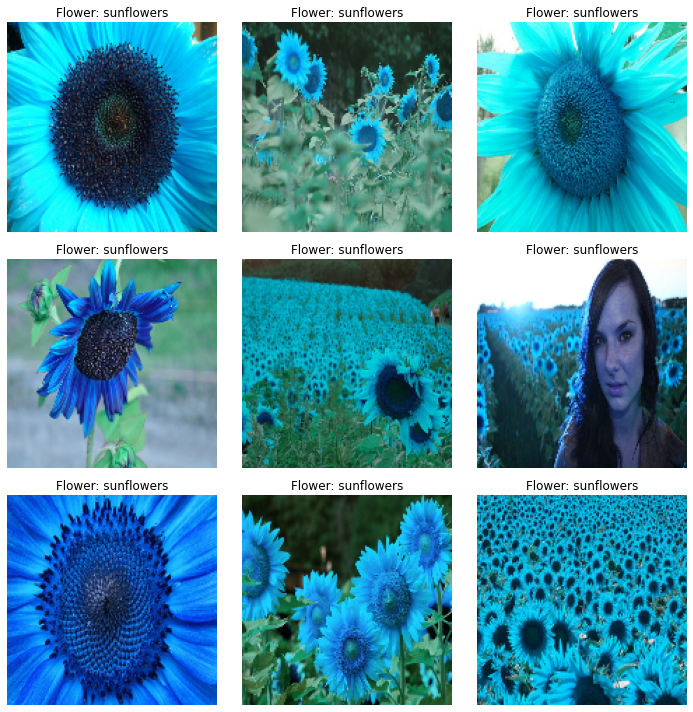

In [ ]:
fig, ax = plt.subplots(3, 3)
fig.set_size_inches(10, 10)
for x in range(3):
  for y in range(3):
    img_data = cv2.imread(flower_urls[x*3+y])
    resized_img_data = cv2.resize(img_data, (150, 150))
    ax[x, y].set_axis_off()
    ax[x, y].imshow(resized_img_data)
    ax[x, y].set_title('Flower: ' + flower_labels[x*3 + y])
plt.tight_layout()
        

Input: Image of Dimension 200 x 200 pixel
Output: Label (One Hot Encoding 0, 1, 2, 3, 4)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(flower_labels)

LabelEncoder()

In [ ]:
flower_labels = le.transform(flower_labels)

In [ ]:
flower_labels[0:5]

array([3, 3, 3, 3, 3])

In [ ]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
flower_labels = to_categorical(flower_labels, 5)

In [ ]:
flower_labels[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
flower_urls[0:5]

['/root/.keras/datasets/flower_photos/sunflowers/2927020075_54c9186797_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/5020805135_1219d7523d.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/5994572653_ea98afa3af_n.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/13117907313_86c99c6441.jpg',
 '/root/.keras/datasets/flower_photos/sunflowers/20171662239_f69b6c12bd_n.jpg']

In [ ]:
def convert_to_img_data(url):
  img_data = cv2.imread(url)
  resized_img_data = cv2.resize(img_data, (150, 150))
  return resized_img_data


In [ ]:
img_datas = list(map(lambda x: convert_to_img_data(x), flower_urls))

In [ ]:
import numpy as np

In [ ]:
img_datas = np.array(img_datas)
flower_labels = np.array(flower_labels)
img_datas = img_datas / 255

NameError: ignored

In [ ]:
# img_datas[0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_datas, flower_labels, test_size=5, random_state=42)

X_train -> To train the neural network

X_val -> To validate the accuracy while training

X_test -> To do some additional check (5 images)



In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print('X_train size: ', len(X_train), 'Y_train size: ', len(y_train))
print('X_val size: ', len(X_val), 'Y_val size: ', len(y_val))
print('X_test size: ', len(X_test), 'Y_test size: ', len(y_test))

X_train size:  2932 Y_train size:  2932
X_val size:  733 Y_val size:  733
X_test size:  5 Y_test size:  5


In [ ]:
import numpy as np
import random

In [ ]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Activation
from keras.optimizers import Adam

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

  model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dense(5, activation = "softmax"))
  return model

In [ ]:
model = create_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 96)       

In [ ]:
model.compile(optimizer=Adam(lr=0.1),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
X_train.shape[0]

2932

In [ ]:
X_train[0].shape

(150, 150, 3)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 480 * 1 batch size = 480 steps
# 480 * 2 batch size = 240 steps
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
model.fit_generator(datagen.flow(X_train,y_train, batch_size=32),
                              epochs = 50, validation_data = (X_val,y_val),
                              verbose = 1)

Epoch 1/50
92/92 [==============================] - 19s 209ms/step - loss: 2236.8145 - accuracy: 0.2285 - val_loss: 1.6144 - val_accuracy: 0.2224
Epoch 2/50
92/92 [==============================] - 17s 190ms/step - loss: 1.6104 - accuracy: 0.2439 - val_loss: 1.6028 - val_accuracy: 0.2333
Epoch 3/50
92/92 [==============================] - 18s 193ms/step - loss: 1.6094 - accuracy: 0.2370 - val_loss: 1.6019 - val_accuracy: 0.2333
Epoch 4/50
92/92 [==============================] - 18s 190ms/step - loss: 1.7058 - accuracy: 0.2336 - val_loss: 1.6092 - val_accuracy: 0.2210
Epoch 5/50
92/92 [==============================] - 17s 190ms/step - loss: 1.6148 - accuracy: 0.2384 - val_loss: 1.6235 - val_accuracy: 0.1528
Epoch 6/50
92/92 [==============================] - 18s 198ms/step - loss: 1.6100 - accuracy: 0.2384 - val_loss: 1.6379 - val_accuracy: 0.2210
Epoch 7/50
92/92 [==============================] - 17s 190ms/step - loss: 1.6111 - accuracy: 0.2370 - val_loss: 1.6033 - val_accuracy: 0.2

KeyboardInterrupt: ignored

In [ ]:
model.fit_generator(datagen.flow(X_train,y_train, batch_size=32),
                              epochs = 50, validation_data = (X_val,y_val),
                              verbose = 1)

Epoch 1/50
92/92 [==============================] - 19s 205ms/step - loss: 1.0235 - accuracy: 0.6497 - val_loss: 0.8062 - val_accuracy: 0.6985
Epoch 2/50
92/92 [==============================] - 18s 198ms/step - loss: 0.7511 - accuracy: 0.7169 - val_loss: 0.7773 - val_accuracy: 0.7108
Epoch 3/50
92/92 [==============================] - 18s 192ms/step - loss: 0.7022 - accuracy: 0.7360 - val_loss: 0.9575 - val_accuracy: 0.6698
Epoch 4/50
92/92 [==============================] - 18s 193ms/step - loss: 0.7000 - accuracy: 0.7340 - val_loss: 0.7707 - val_accuracy: 0.7176
Epoch 5/50
92/92 [==============================] - 18s 191ms/step - loss: 0.6374 - accuracy: 0.7640 - val_loss: 0.7564 - val_accuracy: 0.7299
Epoch 6/50
92/92 [==============================] - 18s 191ms/step - loss: 0.6065 - accuracy: 0.7657 - val_loss: 0.8496 - val_accuracy: 0.6971
Epoch 7/50
92/92 [==============================] - 18s 196ms/step - loss: 0.6029 - accuracy: 0.7773 - val_loss: 0.7903 - val_accuracy: 0.7353

KeyboardInterrupt: ignored

In [ ]:
model.fit(X_train, y_train,
          batch_size=32,
          epochs = 20, validation_data = (X_val,y_val),
          verbose = 1)

Train on 2932 samples, validate on 733 samples
Epoch 1/20
2932/2932 [==============================] - 8s 3ms/step - loss: 0.4508 - accuracy: 0.8397 - val_loss: 1.4911 - val_accuracy: 0.6357
Epoch 2/20
2932/2932 [==============================] - 7s 2ms/step - loss: 0.2674 - accuracy: 0.9069 - val_loss: 1.9156 - val_accuracy: 0.6508
Epoch 3/20
2932/2932 [==============================] - 7s 2ms/step - loss: 0.1777 - accuracy: 0.9427 - val_loss: 1.7561 - val_accuracy: 0.6221
Epoch 4/20
2932/2932 [==============================] - 7s 2ms/step - loss: 0.0568 - accuracy: 0.9823 - val_loss: 2.0354 - val_accuracy: 0.6494
Epoch 5/20
2932/2932 [==============================] - 7s 2ms/step - loss: 0.0557 - accuracy: 0.9816 - val_loss: 2.7194 - val_accuracy: 0.6344
Epoch 6/20
2932/2932 [==============================] - 7s 2ms/step - loss: 0.0952 - accuracy: 0.9690 - val_loss: 2.2212 - val_accuracy: 0.6262
Epoch 7/20
2932/2932 [==============================] - 7s 2ms/step - loss: 0.0868 - accu

KeyboardInterrupt: ignored

In [ ]:
pred=model.predict(X_test)

In [ ]:
pred[1]

array([3.5222068e-02, 2.8042152e-04, 8.0587687e-03, 9.5439303e-01,
       2.0457075e-03], dtype=float32)

In [ ]:
pred_digits=np.argmax(pred,axis=1) # Important!!!! np.argmax

In [ ]:
pred_digits[1]

3

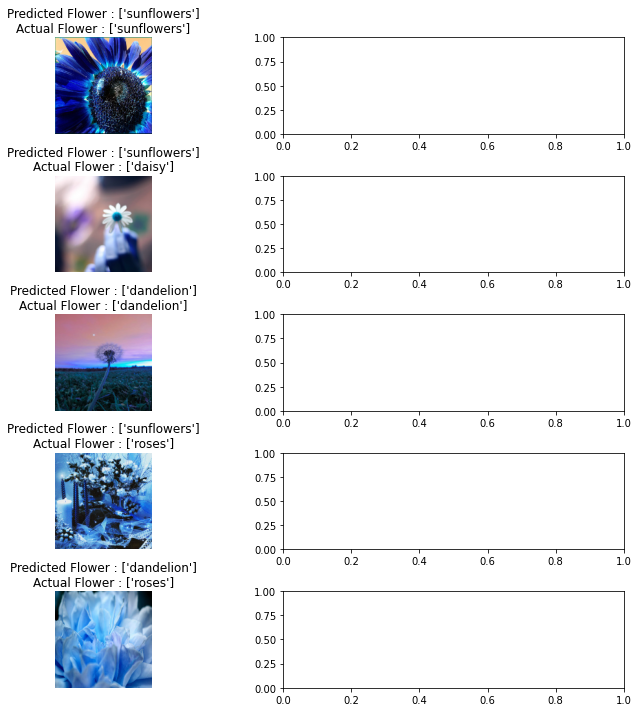

In [ ]:
# Display correctly predicted images
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(10, 10)
for x in range(5):
  for y in range(1):
    ax[x, y].set_axis_off()
    ax[x, y].imshow(X_test[x+y*3])
    # print(le.inverse_transform([np.argmax(y_test[correct_pred[x+y*3]])]))
    ax[x, y].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[x+y*3]]))+
            "\n"+"Actual Flower : "+str(le.inverse_transform([np.argmax([y_test[x+y*3]])])))
plt.tight_layout()
        